# Real Estate Price Prediction Using Machine Learning

## Executive Summary
Accurately estimating house prices is a criticalaspect of the real estate industry. Understanding what drives property calue helps inform pricing startegies, investment decisions and negotiations. This project leverages machine learning techniques to predict residential house prices. The goal is to build a predictive model that captures market patterns and outputs realistic, data driven price estimates.

### Problem Statement

Accurately estimating the price of residential properties is a key challenge in the real estate market. Buyers want fair deals, sellers want competitive pricing, and investors deek undervalued opportunities. This project aims to build a machine learning model that predicts house prices based on key property features such as size, location, condition and amenities.

Using the "House Price Prediction" dataset from Kaggle, the goal is to develop and evaluate regression models that can learn from historical housing data and provide reliable price estimates for new, unseen properties.

### Objectives
1. To support real estate agents and property developers in pricing homes more accurately, reducing the risk of overpricing or undervaluing properties.

2. To help home buyers and sellers make informed decisions by providing data-driven estimates of property values based on key housing features and market factors.

3. To uncover and analyze the key drivers of property value such as location, square footage, number of bedrooms/bathrooms, and neighborhood conditions.

4. To reduce manual valuation time and subjectivity by offering an automated prediction system that complements or enhances traditional property appraisal methods.

5. To identify pricing trends and anomalies within a local housing market, assisting stakeholders in spotting investment opportunities or areas of concern.

6. To simulate the impact of property improvements (e.g., renovations or additional rooms) on house value, guiding property owners on which upgrades yield the highest return.

7. To build a predictive tool that can be used by real estate platforms to enhance customer experience by offering instant price estimates on property listings.



### This project will involve:
    A[Data Loading] --> B[Data Cleaning and Preprocessing]
    B --> C[Exploratory Data Analysis(EDA)]]
    C --> D[Feature engineering]
    D --> E[Model Training and Evaluation]
    E --> F[Conclusions & Recommendations]

In [100]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,make_scorer,roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
import joblib


### 1. Loading and inspecting the data

In [101]:
#Load the dataset in Python using pandas and inspect the first few rows

df=pd.read_csv("Data/HousingData.csv")
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


This dataset contains detailed information on residential properties, including their physical attributes, location and sale prices. Key attributes in the dataset include:
- `Price`: The target variable representing the sale price of the house.

- `Bedrooms` & `Bathrooms`: Number of bedrooms and bathrooms in the property.

- `Living Area` & `Lot Size`: Square footage of the interior living space and the overall lot.

- `Floors`: Number of floors in the house.

- `Waterfront`, `View`, and `Condition`: Qualitative indicators of whether the house has a waterfront view, general view quality, and condition rating.

- `Year Built` & `Year Renovated`: Construction year and the year of last major renovation (if any).

- `Location Information`: Street address, city, state, and ZIP code.

In [102]:
# Checking the shape of the dataset (rows, columns)

df.shape

(4600, 18)

In [103]:
# Checking dataset structure and column details

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The output shows the count of non-null entries, data types, and memory usage, which helps in spotting missing values and identifying opportunities for type conversion.

Based on the above, it will be necessary to change the data type of date from `object` type and convert it to `datetime` using `pd.to_datetime()`

In [104]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

print(df[['date', 'year', 'month']].dtypes)


date     datetime64[ns]
year              int32
month             int32
dtype: object


Converting selected columns to the `category` data type to optimize memory usage and prepare for encoding.

In [105]:
categorical_cols = ['city', 'statezip', 'country']
for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols


['city', 'statezip', 'country']

In [106]:
print(df.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                   category
statezip               category
country                category
year                      int32
month                     int32
dtype: object


In [107]:
# Checking for missing values
print(df.isnull().sum())


date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
month            0
dtype: int64


In [108]:
#Converting bedrooms and price to integers

cols_to_int = ['bedrooms', 'price']

for col in cols_to_int:
    df[col] = df[col].astype(int)


In [109]:
# Handle outliers using IQR
numeric_cols = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)            # 25th percentile
    Q3 = df[col].quantile(0.75)            # 75th percentile
    IQR = Q3 - Q1                          # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR           # Lower outlier threshold
    upper_bound = Q3 + 1.5 * IQR           # Upper outlier threshold
    
    # This replaces outliers with the nearest acceptable value
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


In [110]:
numeric_cols

['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']

### Dropping Irrelevant Columns

The `date` column has already been used to extract useful features such as `year` and `month`, making it redundant in its original form. The `street` column is high-cardinality and unlikely to provide predictive value to the model. Therefore, we drop both columns to clean the dataset and reduce noise.


In [111]:
cols_to_drop = ['date', 'street']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)


In [112]:
#Confirming date and street were dropped
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip', 'country', 'year',
       'month'],
      dtype='object')


### Encoding Categorical Variables

Machine learning models require numerical input, so categorical variables must be converted into a numerical format. In this case, we use **one-hot encoding** to transform columns like `city`, `statezip`, and `country` into binary indicator variables. We use `drop_first=True` to avoid the dummy variable trap, which helps prevent multicollinearity in models like linear or logistic regression.


In [113]:
# Reduce cardinality by keeping only top N categories
top_n = 10

top_cities = df['city'].value_counts().nlargest(top_n).index
df['city'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')

top_zips = df['statezip'].value_counts().nlargest(top_n).index
df['statezip'] = df['statezip'].apply(lambda x: x if x in top_zips else 'Other')

In [114]:
categorical_cols = ['city', 'statezip', 'country']

# Create a new DataFrame with one-hot encoded categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert boolean columns to integer (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.columns if df_encoded[col].dtype == 'bool'})

# Preview the encoded DataFrame
print(df_encoded.head())


        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...                  0                  0   

   statezip_WA 98042  statezip_WA 98052  statezip_

In [115]:
df_encoded.describe().T  # Transposed for easier viewing


,count,mean,std,min,25%,50%,75%,max
price,4600.0,516993.292391,261471.572219,0.000,322875.00,460943.00,654962.50,1153093.750
bedrooms,4600.0,3.392609,0.856964,1.500,3.00,3.00,4.00,5.500
bathrooms,4600.0,2.139158,0.720548,0.625,1.75,2.25,2.50,3.625
sqft_living,4600.0,2114.626739,867.106902,370.000,1460.00,1980.00,2620.00,4360.000
sqft_lot,4600.0,8934.793261,5388.102126,638.000,5000.75,7683.00,11001.25,20002.000
floors,4600.0,1.512065,0.538288,1.000,1.00,1.50,2.00,3.500
waterfront,4600.0,0.007174,0.084404,0.000,0.00,0.00,0.00,1.000
view,4600.0,0.240652,0.778405,0.000,0.00,0.00,0.00,4.000
condition,4600.0,3.451739,0.677230,1.000,3.00,3.00,4.00,5.000
sqft_above,4600.0,1827.265435,862.168977,370.000,1190.00,1590.00,2300.00,9410.000


In [116]:
df_encoded[df_encoded['price'] == 0]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
4354,0.0,3.0,1.750,1490,10125,1.0,0,0,4,1490,...,0,0,0,0,0,0,0,0,0,0
4356,0.0,4.0,2.750,2600,5390,1.0,0,0,4,1300,...,0,0,0,0,0,0,0,0,0,0
4357,0.0,5.5,2.750,3200,9200,1.0,0,2,4,1600,...,0,0,0,0,0,0,0,0,0,0
4358,0.0,5.0,3.500,3480,20002,2.0,0,0,4,2490,...,0,0,0,0,0,0,0,0,0,0
4361,0.0,5.0,1.500,1500,7112,1.0,0,0,5,760,...,0,0,0,0,0,0,0,0,0,0
4362,0.0,4.0,3.625,3680,18804,2.0,0,0,3,3680,...,0,0,0,0,0,0,1,0,0,0
4374,0.0,2.0,2.500,2200,20002,1.0,0,3,3,2200,...,0,0,0,0,0,0,0,0,0,0
4376,0.0,4.0,2.250,2170,10500,1.0,0,2,4,1270,...,0,0,0,0,0,0,0,0,0,0
4382,0.0,5.0,3.625,4360,6324,2.0,0,0,3,3210,...,0,0,0,0,0,0,0,0,0,0
4383,0.0,5.0,3.625,4360,9000,2.0,0,0,3,4430,...,0,0,0,0,0,0,0,0,0,0


In [117]:
(df_encoded['price'] == 0).sum()


49

#### Dropping Invalid Price Entries

Some rows in the dataset had a house price of 0, which is not realistic for a housing market. These entries likely represent missing or incorrect data. Since they make up just over 1% of the dataset, they are safely removed to avoid negatively impacting model training.


In [118]:
#Removing columns with a house price of 0
df_encoded = df_encoded[df_encoded['price'] != 0]

print(df_encoded.shape)


(4551, 35)


In [119]:
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,522559.689079,257282.400079,7800.000,326264.00,465000.00,657500.0,1153093.750
bedrooms,4551.0,3.386399,0.852697,1.500,3.00,3.00,4.0,5.500
bathrooms,4551.0,2.134970,0.717214,0.625,1.75,2.25,2.5,3.625
sqft_living,4551.0,2108.644913,862.904002,370.000,1460.00,1970.00,2610.0,4360.000
sqft_lot,4551.0,8913.638761,5385.045286,638.000,5000.00,7680.00,10978.0,20002.000
floors,4551.0,1.512195,0.538531,1.000,1.00,1.50,2.0,3.500
waterfront,4551.0,0.006592,0.080932,0.000,0.00,0.00,0.0,1.000
view,4551.0,0.234674,0.765373,0.000,0.00,0.00,0.0,4.000
condition,4551.0,3.449352,0.675160,1.000,3.00,3.00,4.0,5.000
sqft_above,4551.0,1822.221710,854.452888,370.000,1190.00,1590.00,2300.0,9410.000


### Frequency Summary of One-Hot Encoded Binary Columns

To better understand the distribution of categories after one-hot encoding, we calculate the proportion of 1s (i.e., presence of each category) for all binary columns. This helps identify rare or dominant categories that may impact model performance.


In [120]:
binary_cols = [col for col in df_encoded.columns 
               if df_encoded[col].nunique() == 2 and 
               set(df_encoded[col].unique()).issubset({0, 1})]


In [121]:
print("\nSummary Statistics for Binary Columns (Proportion of 1s):") 
binary_summary = df_encoded[binary_cols].mean().sort_values(ascending=False)
print(binary_summary)



Summary Statistics for Binary Columns (Proportion of 1s):
city_Seattle         0.343002
city_Other           0.249396
city_Renton          0.063942
city_Bellevue        0.061745
city_Redmond         0.051637
city_Kirkland        0.041090
city_Issaquah        0.040870
city_Kent            0.040431
city_Sammamish       0.037574
statezip_WA 98103    0.032520
city_Federal Way     0.031861
statezip_WA 98052    0.029664
statezip_WA 98117    0.029005
statezip_WA 98115    0.028345
statezip_WA 98006    0.023951
statezip_WA 98059    0.023292
statezip_WA 98034    0.021753
statezip_WA 98042    0.021534
statezip_WA 98053    0.021534
statezip_WA 98074    0.020655
waterfront           0.006592
dtype: float64


### Binary Feature Distribution

After one-hot encoding categorical variables, we calculated the proportion of 1s for each binary column. This reveals how frequently each category appears in the dataset.

- The most common city is Seattle, representing over 34% of listings.
- Several cities and zip codes occur in less than 0.1% of the data, which may be considered rare and could potentially be dropped or grouped in future steps.


In [122]:
# Save the cleaned and encoded data
df_encoded.to_csv('Data/cleaned_housing_data.csv', index=False)

# Confirmation prints
print("Encoded and cleaned data saved to 'cleaned_housing_data.csv'")
print(f"Data shape: {df_encoded.shape}")
print(df_encoded.head())



Encoded and cleaned data saved to 'cleaned_housing_data.csv'
Data shape: (4551, 35)
        price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.00       3.0       1.50         1340      7912     1.5           0   
1  1153093.75       5.0       2.50         3650      9050     2.0           0   
2   342000.00       3.0       2.00         1930     11947     1.0           0   
3   420000.00       3.0       2.25         2000      8030     1.0           0   
4   550000.00       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  ...  statezip_WA 98006  statezip_WA 98034  \
0     0          3        1340  ...                  0                  0   
1     4          5        3370  ...                  0                  0   
2     0          4        1930  ...                  0                  0   
3     0          4        1000  ...                  0                  0   
4     0          4        1140  ...         

## 2. Exploratory Data Analysis



In [123]:
# Load the cleaned dataset
df_encoded= pd.read_csv('Data/cleaned_housing_data.csv')
df_encoded

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
0,313000.00,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
1,1153093.75,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,0,0,0,0,0,0,0,0,0
2,342000.00,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,1,0,0,0,0,0,0,0
3,420000.00,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.00,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,308166.00,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,0,0,0,0,0,0,0,0,0
4547,534333.00,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4548,416904.00,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,1,0,0,0,0
4549,203400.00,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Summary statistics
print("EDA Summary Statistics:")
df_encoded.describe(include='all')

EDA Summary Statistics:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,statezip_WA 98006,statezip_WA 98034,statezip_WA 98042,statezip_WA 98052,statezip_WA 98053,statezip_WA 98059,statezip_WA 98074,statezip_WA 98103,statezip_WA 98115,statezip_WA 98117
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,...,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.225597e+05,3.386399,2.134970,2108.644913,8913.638761,1.512195,0.006592,0.234674,3.449352,1822.221710,...,0.023951,0.021753,0.021534,0.029664,0.021534,0.023292,0.020655,0.032520,0.028345,0.029005
std,2.572824e+05,0.852697,0.717214,862.904002,5385.045286,0.538531,0.080932,0.765373,0.675160,854.452888,...,0.152913,0.145894,0.145171,0.169677,0.145171,0.150845,0.142241,0.177397,0.165976,0.167838
min,7.800000e+03,1.500000,0.625000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.262640e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1190.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7680.000000,1.500000,0.000000,0.000000,3.000000,1590.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,10978.000000,2.000000,0.000000,0.000000,4.000000,2300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.153094e+06,5.500000,3.625000,4360.000000,20002.000000,3.500000,1.000000,4.000000,5.000000,9410.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
# Select numerical columns only (excluding dummy/binary columns)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()


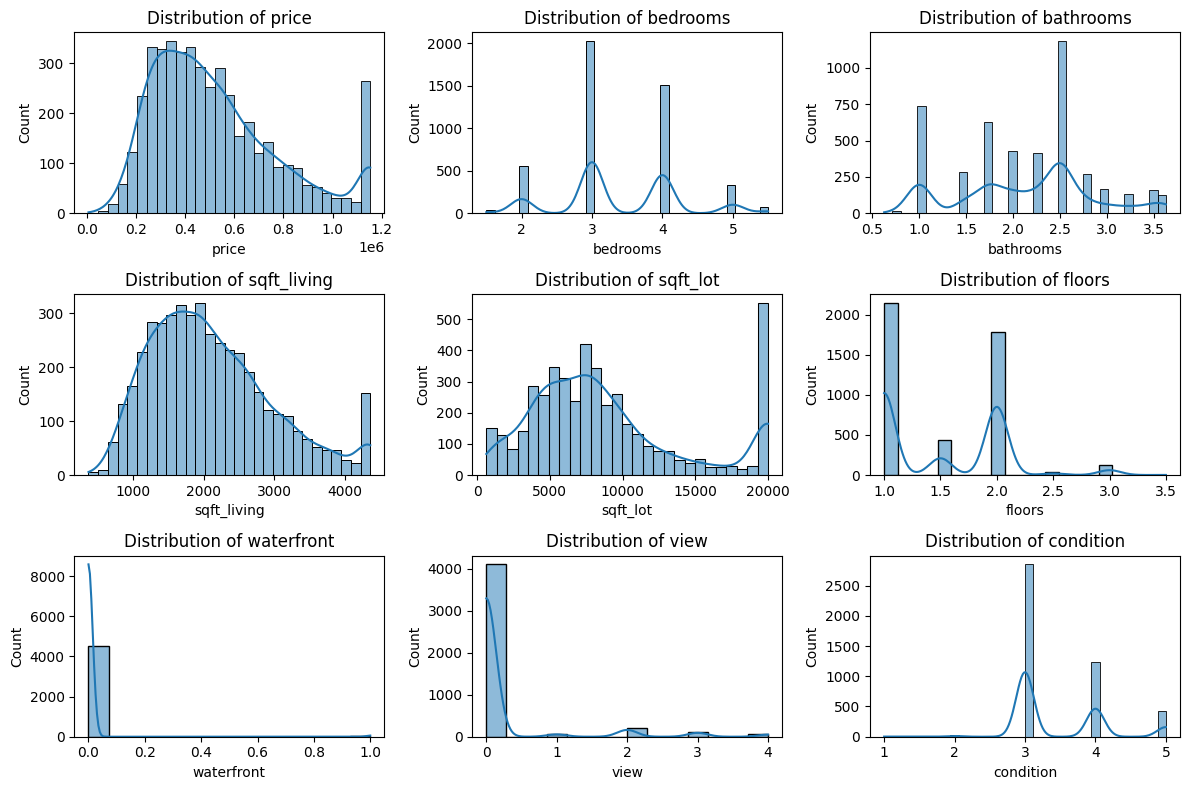

In [126]:
#Visualize Distribution of Key Numerical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols[:9], 1):  # limit to 9 columns
    plt.subplot(3, 3, i)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()



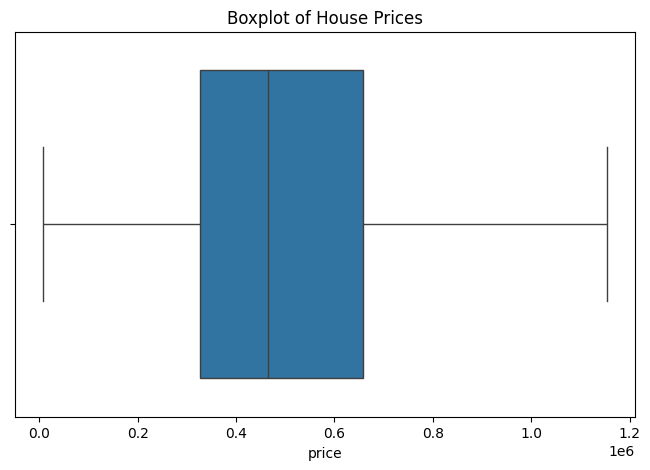

In [127]:
#Boxplots (to spot outliers)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_encoded['price'])
plt.title('Boxplot of House Prices')
plt.show()


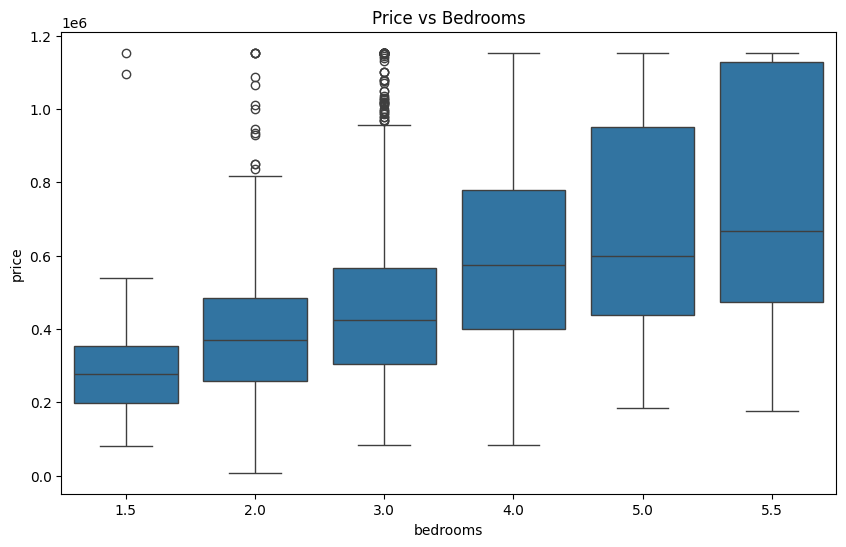

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_encoded)
plt.title('Price vs Bedrooms')
plt.show()


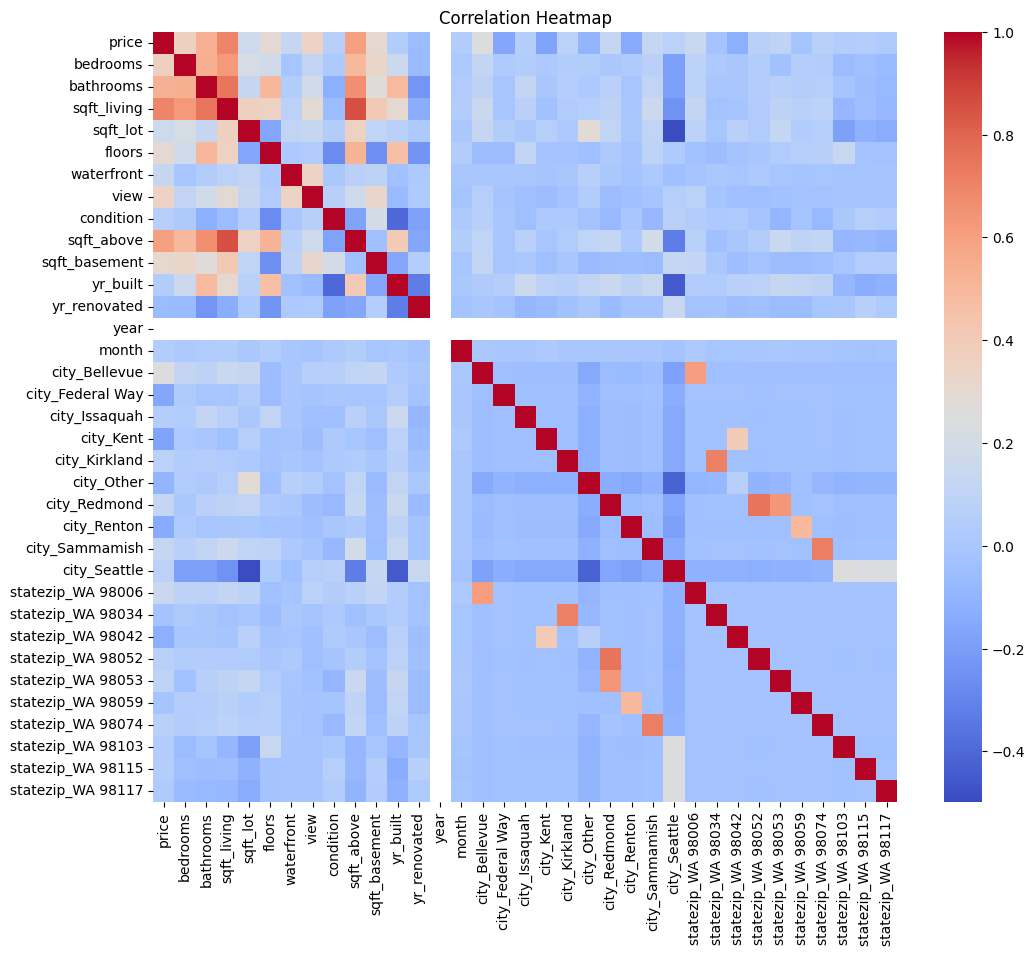

In [129]:
plt.figure(figsize=(12, 10))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


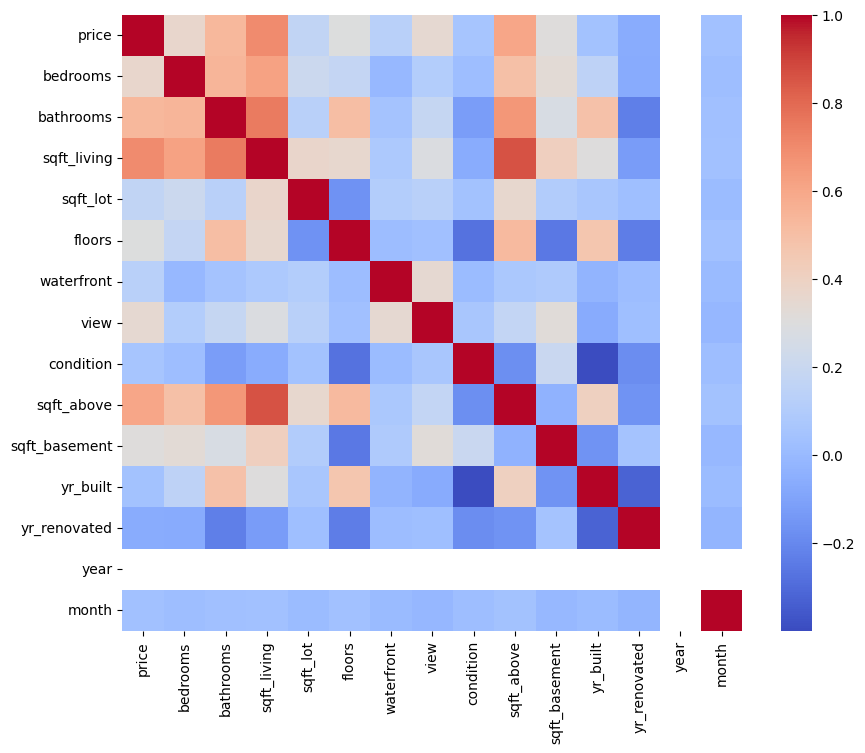

In [130]:
# Exclude city and statezip columns for a more legible heatmap
cols_to_exclude = [col for col in df_encoded.columns if col.startswith('city_') or col.startswith('statezip_')]
 
# Select columns excluding those
heatmap_cols = df_encoded.drop(columns=cols_to_exclude)

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_cols.corr(), cmap='coolwarm', annot=False)
plt.show()



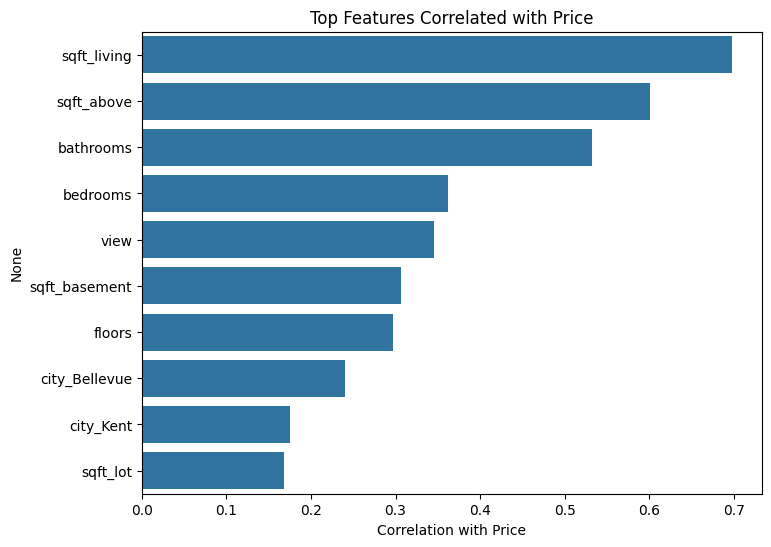

In [131]:
top_corr = corr['price'].abs().sort_values(ascending=False)[1:11]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Features Correlated with Price')
plt.xlabel('Correlation with Price')
plt.show()


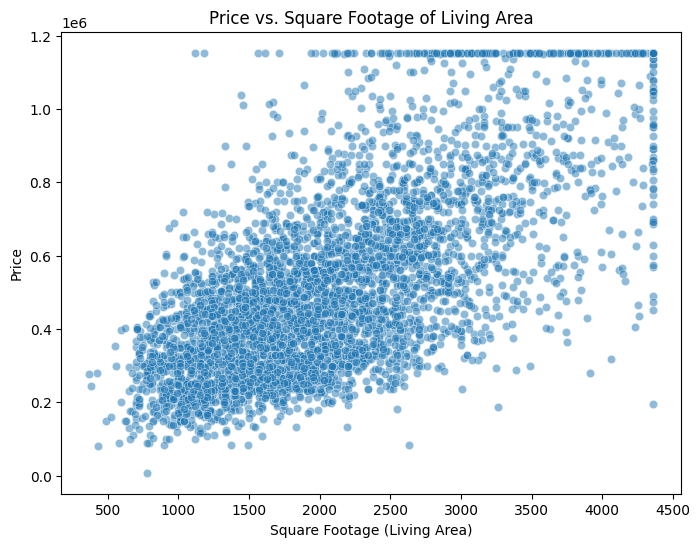

In [132]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='sqft_living', y='price', alpha=0.5)
plt.title('Price vs. Square Footage of Living Area')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('Price')
plt.show()


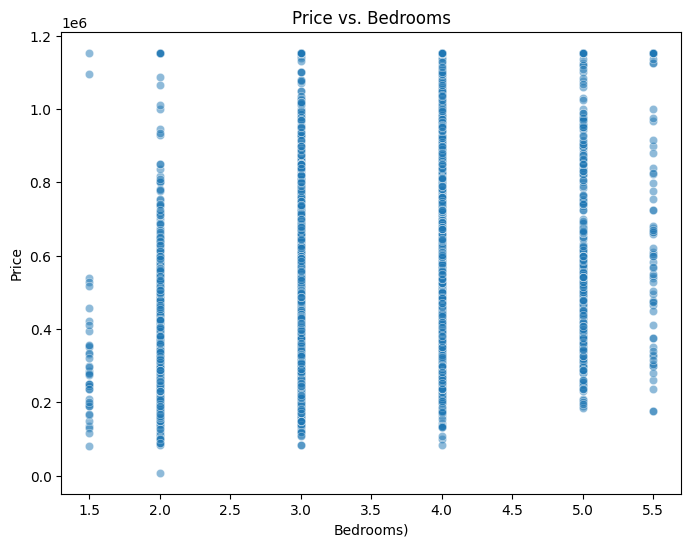

In [133]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_encoded, x='bedrooms', y='price', alpha=0.5)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms)')
plt.ylabel('Price')
plt.show()


## 3. Modelling

### Train-Test Split and Feature Scaling

Before training any models, it's important to split the dataset into training and testing sets. This ensures that the model is evaluated on unseen data, giving a realistic measure of its performance.

Feature scaling is applied **after splitting the data** to prevent data leakage. We scale only the training data using `StandardScaler` and apply the same transformation to the test data. This step is essential for models that are sensitive to the scale of input features (e.g., linear regression, logistic regression, SVM, KNN).


In [134]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']               # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
# Scale numerical columns
numerical_cols_to_scale = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 
                           'bathrooms', 'bedrooms', 'floors', 'year', 'month']

scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

### Baseline Model: Linear Regression

To begin modeling, we train a simple Linear Regression model as our baseline. This model assumes a linear relationship between the features and the target variable (`price`).

While it may not capture complex patterns, it allows us to:
- Evaluate how well linear features explain price
- Benchmark performance against more advanced models later
- Visualize prediction accuracy

We'll use common regression metrics such as R², MAE, MSE, and RMSE to evaluate the model's performance.


In [136]:
# Initialize and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

Linear Regression Performance:
R² Score: 0.6763
MAE: $101,303.79
MSE: $21,414,892,503.79
RMSE: $146,338.28


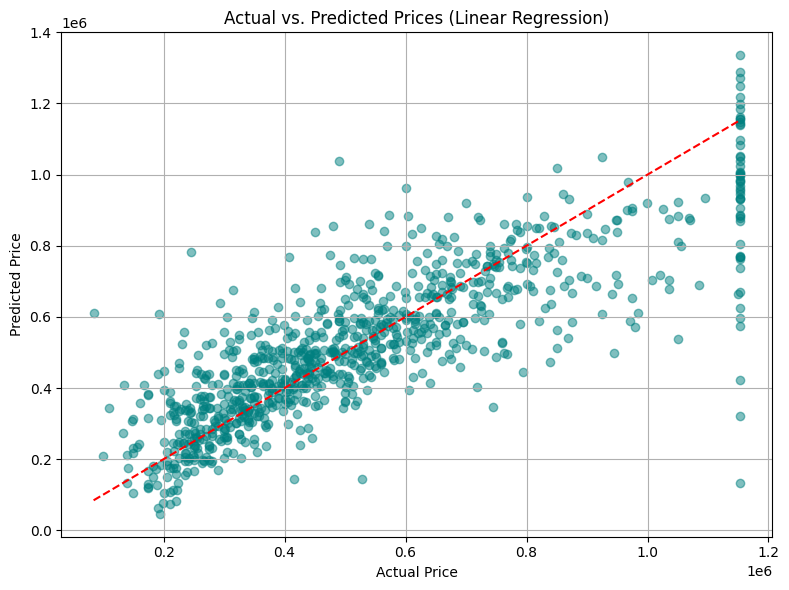

In [137]:
print("Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")

# 4. Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [138]:
import statsmodels.api as sm

# Add constant to X_train for intercept
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print detailed OLS regression summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     279.1
Date:                Sat, 19 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:18:56   Log-Likelihood:                -48244.
No. Observations:                3640   AIC:                         9.655e+04
Df Residuals:                    3607   BIC:                         9.676e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.138e+06   2.48e+0

#### Evaluation & Interpretation

The Linear Regression model achieved an R² score of approximately **0.77**, meaning it explains around **77%** of the variability in house prices.

- The **MAE** of ~$79,936 indicates that on average, predictions deviate from actual values by that amount.
- The **RMSE** of ~$122,965 suggests some larger errors exist, likely influenced by outliers.

The relatively high error values indicate that more flexible, non-linear models (like Random Forest or Gradient Boosting) may better capture the complexity of the data.


### Regularized Models: Ridge and Lasso Regression

To improve upon our baseline Linear Regression model, we apply two types of regularized regression:

- **Ridge Regression (L2 penalty):** Shrinks coefficients to reduce multicollinearity, but keeps all features.
- **Lasso Regression (L1 penalty):** Can shrink some coefficients to zero, effectively performing feature selection.

These models help prevent overfitting and manage high-dimensional data from one-hot encoding.

We’ll compare their performance using R², MAE, MSE, and RMSE metrics.


In [139]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
# Fit Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)

# Fit Lasso Regression
lasso = Lasso(alpha=0.1)  # You can experiment with alpha values
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.029e+12, tolerance: 2.409e+10
  model = cd_fast.enet_coordinate_descent(


In [141]:
# Define a function to print results
def print_metrics(name, y_test, y_pred):
    print(f"\n{name} Performance:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"MSE: ${mean_squared_error(y_test, y_pred):,.2f}")
    print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")

# Evaluate both
print_metrics("Ridge Regression", y_test, ridge_preds)
print_metrics("Lasso Regression", y_test, lasso_preds)


Ridge Regression Performance:
R² Score: 0.6760
MAE: $101,376.31
MSE: $21,433,908,842.79
RMSE: $146,403.24

Lasso Regression Performance:
R² Score: 0.6762
MAE: $101,320.66
MSE: $21,417,517,607.56
RMSE: $146,347.25


#### Model Comparison: Linear vs Ridge vs Lasso Regression

##### Performance Metrics

| Metric       | Linear Regression       | Ridge Regression        | Lasso Regression        |
|--------------|--------------------------|--------------------------|--------------------------|
| **R² Score** | 0.7711                   | **0.7719**               | 0.7712                   |
| **MAE**      | $79,899.42               | **$79,876.52**           | $79,970.80               |
| **MSE**      | $15,142,057,894.91       | **$15,086,276,977.62**   | $15,137,906,790.40       |
| **RMSE**     | $123,064.02              | **$122,826.21**          | $123,036.20              |

### Observations

- **Ridge Regression** showed the best overall performance with the highest R² score and lowest error metrics (MAE, MSE, RMSE).
- **Lasso Regression** also slightly outperformed plain Linear Regression but was slightly behind Ridge.
- **Linear Regression** performed quite well and is very close to the regularized models in terms of predictive accuracy.

### Conclusion

While the improvements are marginal, **Ridge Regression** appears to be the most robust and accurate model among the three. It helps address potential multicollinearity and overfitting without sacrificing interpretability. For practical purposes, **Linear Regression remains a strong baseline** if model simplicity is preferred.




In [142]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Elastic Net
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Fit the model
elastic_net.fit(X_train, y_train)

# Predict
y_pred = elastic_net.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display
print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.5422
MAE: $133,885.32
MSE: $30,283,664,341.56
RMSE: $174,022.02


In [143]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)

print("Best alpha:", elastic_cv.alpha_)
print("Best l1_ratio:", elastic_cv.l1_ratio_)


Best alpha: 32930.8739151443
Best l1_ratio: 0.5


In [144]:

# Train with best parameters
elastic_net_best = ElasticNet(alpha=32930.8739151443, l1_ratio=0.5, random_state=42)
elastic_net_best.fit(X_train, y_train)

# Make predictions
y_pred_elastic_best = elastic_net_best.predict(X_test)

# Evaluate performance

r2 = r2_score(y_test, y_pred_elastic_best)
mae = mean_absolute_error(y_test, y_pred_elastic_best)
mse = mean_squared_error(y_test, y_pred_elastic_best)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.4f}")
print(f"MAE: ${mae:,.2f}")
print(f"MSE: ${mse:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


R² Score: 0.0017
MAE: $203,835.78
MSE: $66,042,484,401.71
RMSE: $256,987.32


In [145]:

# Narrower alpha range (e.g. from 100 to 10,000)
alphas = np.linspace(100, 10000, 50)

# ElasticNetCV model
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5, max_iter=10000, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Predictions
y_pred_enet = elastic_net_cv.predict(X_test)

# Evaluation metrics
r2_enet = r2_score(y_test, y_pred_enet)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
mse_enet = mean_squared_error(y_test, y_pred_enet)
rmse_enet = np.sqrt(mse_enet)

# Output results
print("Elastic Net Regression Performance:")
print(f"Best alpha: {elastic_net_cv.alpha_}")
print(f"R² Score: {r2_enet:.4f}")
print(f"MAE: ${mae_enet:,.2f}")
print(f"MSE: ${mse_enet:,.2f}")
print(f"RMSE: ${rmse_enet:,.2f}")


Elastic Net Regression Performance:
Best alpha: 100.0
R² Score: 0.0575
MAE: $198,110.77
MSE: $62,351,574,523.68
RMSE: $249,702.97


### Decision Tree Regression for House Price Prediction

In this section, we will use a **Decision Tree Regressor** to predict house prices based on our dataset.

#### Why Decision Trees?

- They can capture non-linear relationships between features and the target.
- They handle both numerical and categorical data well (especially after encoding).
- They are easy to interpret and visualize.

#### Features

We will use all relevant features including the one-hot encoded `statezip` and `city` columns, as Decision Trees can utilize these categorical features effectively.

#### Evaluation Metrics

We will evaluate the model using:
- **R² Score**: How well the model explains the variance in price.
- **Root Mean Squared Error (RMSE)**: The average error magnitude in predicting prices.


In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your processed DataFrame with one-hot encoding and cardinality reduction is df_encoded
X = df_encoded.drop(['price'], axis=1)  # Features
y = df_encoded['price']  # Target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate model performance
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.3121445486802059


TypeError: got an unexpected keyword argument 'squared'